<a href="https://colab.research.google.com/github/NikolaJenkins/MNIST-Numbers/blob/main/mnist_all_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 45.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
matplotlib.rc('image', cmap='Greys')
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
train = (path/'training').ls().sorted()
test = (path/'testing').ls().sorted()

In [3]:
train_tensors = {}
for path in train:
  train_tensors[path.name] = [tensor(Image.open(o)) for o in path.ls()]
len(train_tensors['3']), len(train_tensors['5'])

(6131, 5421)

In [4]:
#hide_output
df = pd.DataFrame(train_tensors['5'][5420])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,29,29,29,13,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,179,252,252,252,207,169,169,44,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,76,0,19,123,246,253,252,252,252,253,252,252,190,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,126,249,226,231,252,252,241,139,139,139,78,28,28,15,0,0
9,0,0,0,0,0,0,0,0,0,0,0,70,253,253,255,247,225,125,51,0,0,0,0,0,0,0,0,0


In [5]:
stacked_tensors = {}
for t in train_tensors:
  stacked_tensors[t] = torch.stack(train_tensors[t]).float()/255

stacked_tensors['3'].shape, len(stacked_tensors['3'].shape), stacked_tensors['5'].shape, len(stacked_tensors['3'].shape) == len(stacked_tensors['5'].shape)

(torch.Size([6131, 28, 28]), 3, torch.Size([5421, 28, 28]), True)

<Axes: >

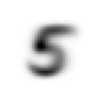

In [6]:
means = {}
for s in stacked_tensors:
  means[s] = stacked_tensors[s].mean(0)
show_image(means['5'])

<Axes: >

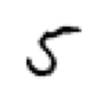

In [7]:
a_5 = stacked_tensors['5'][5420]
show_image(a_5)

In [8]:
dist_5_abs = (a_5 - means['5']).abs().mean()
dist_5_sqr = ((a_5 - means['5'])**2).mean().sqrt()
dist_5_abs,dist_5_sqr

(tensor(0.1204), tensor(0.2137))

In [9]:
F.l1_loss(a_5.float(),means['5']), F.mse_loss(a_5,means['5']).sqrt()

(tensor(0.1204), tensor(0.2137))

In [10]:
test_tensors = {}
for path in test:
  test_tensors[path.name] = torch.stack([tensor(Image.open(o)) for o in path.ls()])
  test_tensors[path.name] = test_tensors[path.name].float()/255

In [11]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_5, means['5'])

tensor(0.1204)

In [12]:
testing_5_dist = mnist_distance(test_tensors['5'], means['5'])
testing_5_dist, testing_5_dist.shape

(tensor([0.1372, 0.1305, 0.1266, 0.1547, 0.1357, 0.1559, 0.1465, 0.1539, 0.1524, 0.1457, 0.1302, 0.1531, 0.1453, 0.1182, 0.1443, 0.1372, 0.1184, 0.1272, 0.1306, 0.1177, 0.1320, 0.1277, 0.1495, 0.1191,
         0.1313, 0.1418, 0.1345, 0.1171, 0.1201, 0.1683, 0.1621, 0.1223, 0.1636, 0.1142, 0.1603, 0.1331, 0.1277, 0.1189, 0.1204, 0.1314, 0.1464, 0.1286, 0.1283, 0.1973, 0.1601, 0.1743, 0.1254, 0.1358,
         0.1245, 0.1338, 0.1491, 0.1649, 0.1455, 0.1333, 0.1304, 0.1858, 0.1282, 0.1399, 0.1104, 0.1538, 0.1220, 0.1457, 0.1390, 0.1148, 0.1545, 0.1312, 0.1257, 0.1481, 0.1439, 0.1252, 0.1409, 0.1232,
         0.1168, 0.1433, 0.1379, 0.1422, 0.1383, 0.1271, 0.1355, 0.1140, 0.1329, 0.1303, 0.1508, 0.1377, 0.1503, 0.1369, 0.1530, 0.1318, 0.1249, 0.1270, 0.1183, 0.1328, 0.1401, 0.1444, 0.1223, 0.1353,
         0.1210, 0.1341, 0.1123, 0.1340, 0.1435, 0.1707, 0.1314, 0.1594, 0.1753, 0.1603, 0.1571, 0.1314, 0.1492, 0.1309, 0.1476, 0.1371, 0.1519, 0.1377, 0.1523, 0.1378, 0.1223, 0.1352, 0.1695, 0.1

In [13]:
def is_3(x): return mnist_distance(x, means['3']) < mnist_distance(x, means['5'])

In [14]:
def determine_number(val):
  err = torch.stack([(mnist_distance(val, means[str(m)])) for m in range(10)], dim = 1)
  err = torch.argmin(err, dim = 1)
  return err

In [15]:
is_3(test_tensors['3'][5]), is_3(test_tensors['3'][5]).float()

(tensor(True), tensor(1.))

In [16]:
import builtins

In [17]:
acc = {}
for k, test_tensor in test_tensors.items():
  preds = determine_number(test_tensor)
  total_sum = builtins.sum(pred.item() == int(k) for pred in preds)
  acc[k] = total_sum / len(preds)
builtins.sum(acc.values()) / len(acc)

0.6610330933054313

In [18]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [19]:
train_x = torch.cat([s for s in stacked_tensors.values()]).view(-1, 28*28)
train_y = [[int(n)] * len(tensor) for n, tensor in train_tensors.items()]
train_y = torch.cat([tensor(l) for l in train_y]).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [20]:
train_dset = list(zip(train_x,train_y))
x,y = train_dset[0]
x.shape,y

(torch.Size([784]), tensor([0]))

In [21]:
# Concatenate all test tensors and flatten them
test_x = torch.cat([test_tensor for test_tensor in test_tensors.values()]).view(-1, 28*28)

# Create the corresponding labels for the test set
# Iterate through the test_tensors items to get the digit (key) and the tensor (value)
# Create a list of lists where each inner list contains the digit (as an integer) repeated
# for the number of images for that digit.
test_y_list = [[int(n)] * len(tensor) for n, tensor in test_tensors.items()]
# Concatenate the lists of labels into a single tensor and add an extra dimension
test_y = torch.cat([tensor(l) for l in test_y_list]).unsqueeze(1)

# Create the test dataset
test_dset = list(zip(test_x,test_y))

test_x.shape, test_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [22]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [23]:
weights = init_params((28*28,10))
bias = init_params(10)

In [24]:
def linear1(xb): return xb@weights + bias
preds = linear1(train_x)
preds = F.softmax(preds, dim = 1)
preds[3]

tensor([9.3325e-01, 1.7821e-04, 9.6266e-05, 5.9139e-04, 8.3090e-09, 4.1380e-04, 2.1970e-09, 4.1739e-08, 7.6140e-06, 6.5467e-02], grad_fn=<SelectBackward0>)

In [25]:
# Calculate predicted class for each item in the batch
predicted_classes = torch.argmax(preds, dim=1)
# Compare predicted classes with the actual target labels
# Use squeeze() to remove the extra dimension from train_y for correct comparison
corrects = predicted_classes == train_y.squeeze()

corrects[3], torch.argmax(preds[3]) == train_y[3]

(tensor(True), tensor([True]))

In [26]:
corrects.float().mean().item()

0.12043333053588867

In [27]:
def mnist_loss(predictions, targets):
  return F.cross_entropy(predictions, targets.squeeze()).mean()

In [28]:
train_dl = DataLoader(train_dset, batch_size=256, shuffle = True)
xb,yb = first(train_dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [29]:
test_dl = DataLoader(test_dset, batch_size=256)

In [30]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [31]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb.squeeze())
    loss.backward()

In [32]:
def train_epoch(model, lr, params):
    for xb,yb in train_dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [33]:
def batch_accuracy(xb, yb):
    preds = F.softmax(xb, dim = 1)
    predicted_vals = torch.argmax(preds, dim = 1)
    correct = predicted_vals == yb.squeeze()
    return correct.float().mean()

In [34]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [35]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in test_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [36]:
validate_epoch(linear1)

0.1258

In [37]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8462

In [38]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.8756 0.8807 0.8937 0.8951 0.8971 0.8839 0.907 0.9021 0.9002 0.9126 0.9058 0.8906 0.9103 0.9141 0.9052 0.9096 0.9154 0.9142 0.9132 0.9049 

In [39]:
linear_model = nn.Linear(28*28,10)

In [40]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([10, 784]), torch.Size([10]))

In [41]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [42]:
opt = BasicOptim(linear_model.parameters(), lr)

In [45]:
def train_epoch(model):
    for xb,yb in train_dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [46]:
validate_epoch(linear_model)

0.1351

In [47]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [48]:
train_model(linear_model, 20)

0.9016 0.9145 0.9164 0.9155 0.9099 0.9212 0.9251 0.9185 0.9258 0.9222 0.9232 0.9115 0.9232 0.9239 0.9238 0.9249 0.9181 0.9236 0.9262 0.9251 

In [49]:
linear_model = nn.Linear(28*28,10)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.9077 0.9182 0.9247 0.9149 0.9183 0.9216 0.9197 0.894 0.9127 0.9225 0.9218 0.9229 0.9265 0.9192 0.9212 0.9249 0.9192 0.9212 0.9222 0.9243 

In [50]:
dls = DataLoaders(train_dl, test_dl)

In [51]:
learn = Learner(dls, nn.Linear(28*28,10), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [52]:
learn.fit(10, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.341742,0.312840,0.913400,00:00
1,0.313101,0.305905,0.914500,00:00
2,0.299361,0.290614,0.916700,00:00
3,0.285431,0.279790,0.921400,00:00
4,0.280234,0.285350,0.920800,00:00
5,0.271623,0.271999,0.923100,00:00
6,0.288694,0.285205,0.918500,00:00
7,0.270280,0.282628,0.921400,00:00
8,0.269560,0.279874,0.923000,00:00
9,0.270852,0.299659,0.911700,00:00


In [53]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [54]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

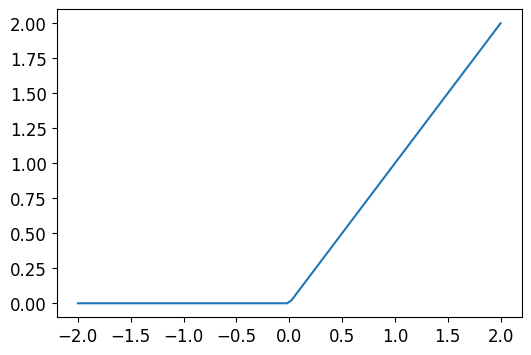

In [55]:
plot_function(F.relu)

In [59]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10)
)

In [60]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [61]:
#hide_output
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.464074,0.383832,0.894800,00:01
1,0.348266,0.316806,0.910300,00:00
2,0.310997,0.292208,0.917900,00:01
3,0.279683,0.271147,0.925600,00:01
4,0.269384,0.255986,0.927500,00:01
5,0.250594,0.250590,0.930700,00:01
6,0.237263,0.245518,0.929900,00:00
7,0.228542,0.228223,0.933300,00:00
8,0.219755,0.219657,0.937100,00:00
9,0.213189,0.212519,0.938700,00:00


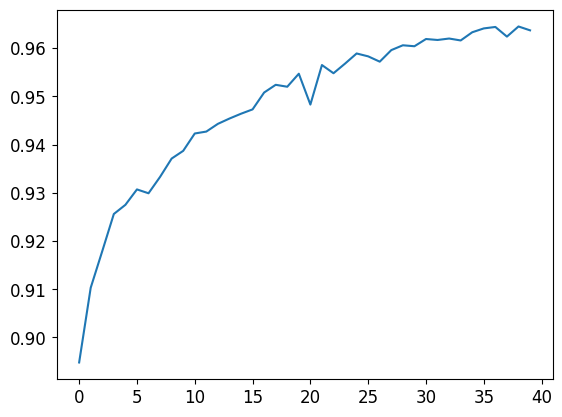

In [62]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [65]:
learn.recorder.values[-1][2]

0.963699996471405

In [ ]:
try:
    # Check if 'sum' is defined in the current global scope
    if 'sum' in globals():
        print(f"Variable 'sum' found in globals.")
        print(f"Type of 'sum': {type(sum)}")
        print(f"Value of 'sum': {sum}")
    else:
        print("Variable 'sum' not found in globals.")
except Exception as e:
    print(f"An error occurred while checking for 'sum': {e}")

# You can also check the built-in sum function for comparison
print(f"Type of built-in sum: {type(builtins.sum)}")

Variable 'sum' found in globals.
Type of 'sum': <class 'int'>
Value of 'sum': 291
Type of built-in sum: <class 'builtin_function_or_method'>
